# Regression

[Linear Regression](https://app.pluralsight.com/ilx/video-courses/clips/f5e161f8-060a-40ea-b279-4db7b456bdcd)

[Setting up a regrerssion problem](https://app.pluralsight.com/ilx/video-courses/4b4cdb5a-b0b9-4c17-8e5c-9d9e07e522a0/38be9250-ced7-4d6c-a6e8-aa0fa9a1bf9b/86eb9537-19f4-4a08-b10e-96069e890043)

## The quality of a Linear Regression

R^2 = ESS / TSS = Explained Sum of Squares / Total Sum of Squares = Fitted Variance / Total Vatiance

ESS measures the variance of the fitted values.  
TSS measures the variance of the data values to fit with a linear model.   
R^2 is the proportion of the TTS that is **explained** by the linear regression.

## The Adjusted R^2 for multiple regression

aR^2 = R^2 * (Penalty for adding irrelevant variables)  

**Irrelevant variables** are defined as any group whose **F-Ratio** is lower than 1.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style='darkgrid')

https://www.kaggle.com/datasets/shaistashaikh/carprice-assignment

In [4]:
car_data = pd.read_csv('datasets/CarPrice_Assignment.csv')

In [6]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Explore the distribution of the Price variable from this dataset.

C:\Users\pb00270\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


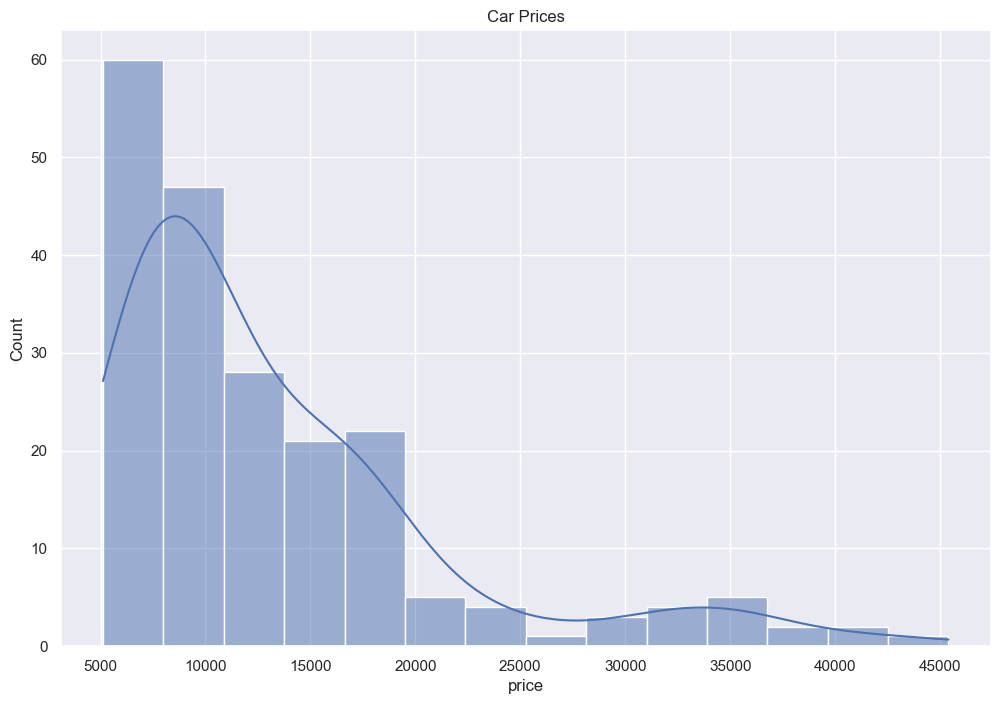

In [9]:
plt.figure(figsize=(12,8))
plt.title('Car Prices')
sns.histplot(data=car_data,x='price',kde=True)
plt.show()

We inspect whether it is possible that the type of fuel has an influence over the price of a car.

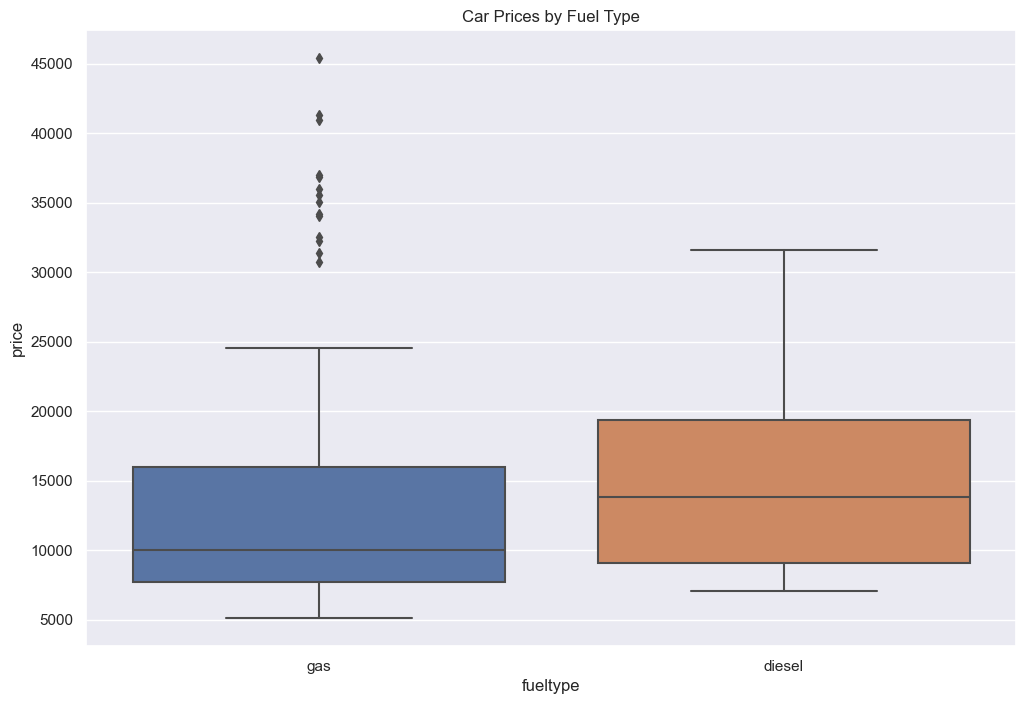

In [10]:
plt.figure(figsize=(12,8))
plt.title('Car Prices by Fuel Type')
sns.boxplot(data=car_data,x='fueltype',y='price')
plt.show()

We inspect whether it is possible that the drivewheel as an influence over the price of a car.

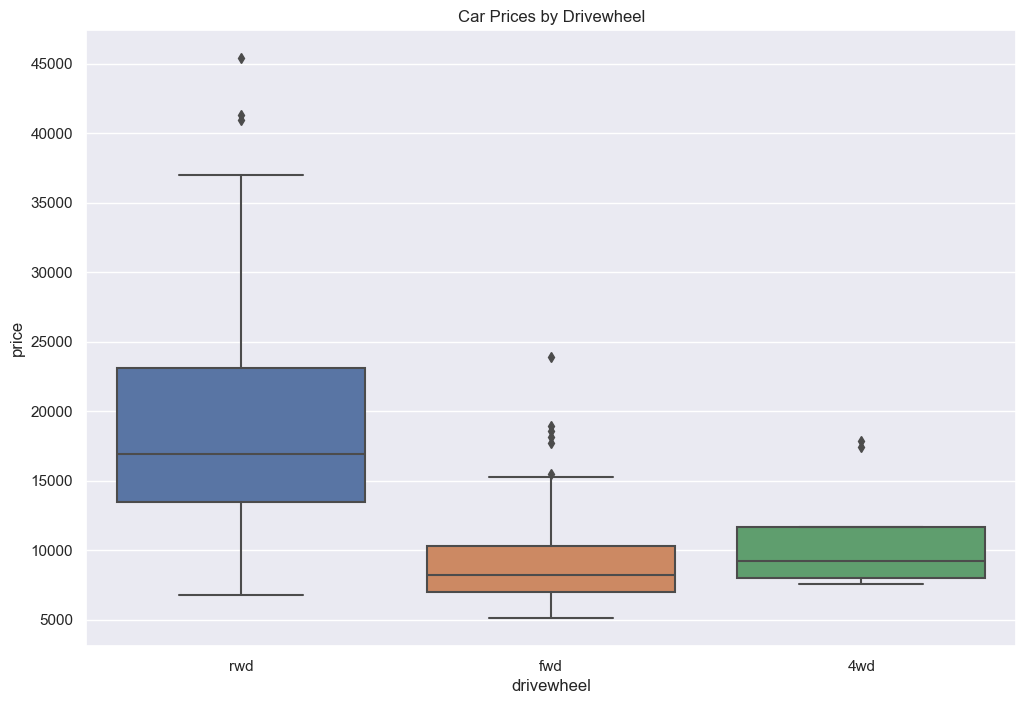

In [11]:
plt.figure(figsize=(12,8))
plt.title('Car Prices by Drivewheel')
sns.boxplot(data=car_data,x='drivewheel',y='price')
plt.show()

We inspect whether it is possible that the horse power as an influence over the price of a car.
For this a **scatter plot** is most suitable.

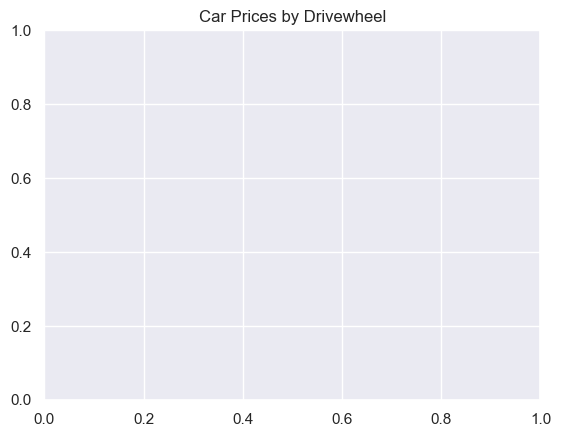

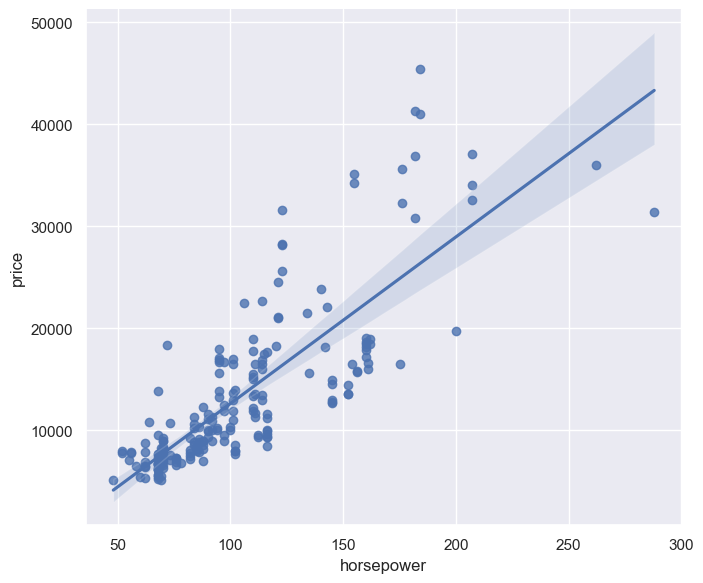

In [12]:
sns.lmplot(data=car_data,x='horsepower',y='price',height=6, aspect=1.2)
plt.show()